1. Градиентный спуск и его модификации
* Выбрать тестовые функции оптимизации (2 шт)
* Запрограммировать собственную реализацию классического градиентного спуска
* Запрограммировать пайплайн тестирования алгоритма оптимизации
    * Визуализации функции и точки оптимума
    * Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
    * Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
* Запрограммировать метод вычисления градиента
    * Передача функции градиента от пользователя
    * Символьное вычисление градиента (например с помощью sympy) (на доп балл)
    * Численная аппроксимация градиента (на доп балл)
* Запрограммировать одну моментную модификацию и протестировать ее
* Запрограммировать одну адаптивную модификацию и протестировать ее
* Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их



## Выбрать тестовые функции оптимизации (2 шт)

* Функция сферы
* Функция Химмельблау

## Запрограммировать собственную реализацию классического градиентного спуска

[ 1.52445832e-05 -4.57337496e-05]


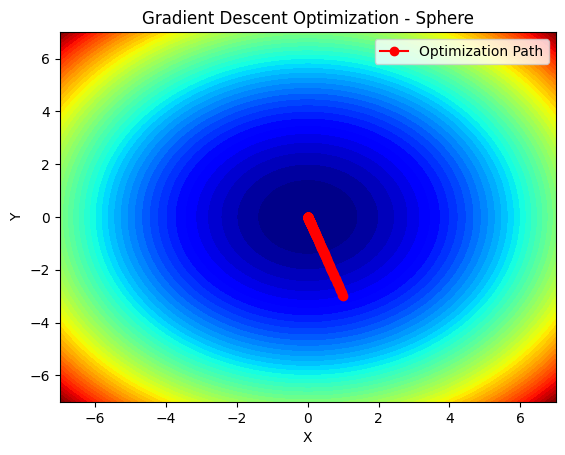

[ 3.58442856 -1.84812894]


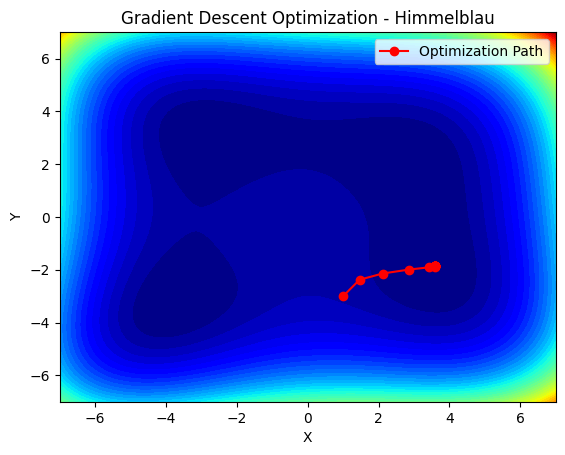

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def sphere(x, y):
    return x ** 2 + y ** 2

def sphere_grad(x, y):
    dx = 2 * x
    dy = 2 * y
    return np.array([dx, dy])

def himmelblau(x,y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 -7) ** 2

def himmelblau_grad(x, y):
    dx = 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    dy = 2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)
    return np.array([dx, dy])

def gradient_descent(function, grad_function, start_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path), function(x, y)

start_point = np.array([1.0, -3.0])
functions = [sphere, himmelblau]
functions_grad = [sphere_grad, himmelblau_grad]
function_names = ['Sphere', 'Himmelblau']

for func, func_grad, name in zip(functions, functions_grad, function_names):
    path, final_value = gradient_descent(func, func_grad, start_point)
    print(path[-1])
    x = np.linspace(-7, 7, 400)
    y = np.linspace(-7, 7, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)
    plt.figure()
    plt.title(f'Gradient Descent Optimization - {name}')
    plt.contourf(X, Y, Z, cmap='jet', levels=50)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


## Запрограммировать пайплайн тестирования алгоритма оптимизации
    * Визуализации функции и точки оптимума
    * Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
    * Визуализации точки найденного решения (можно добавить анимацию)

Mean error for sphere: 0.0000000024


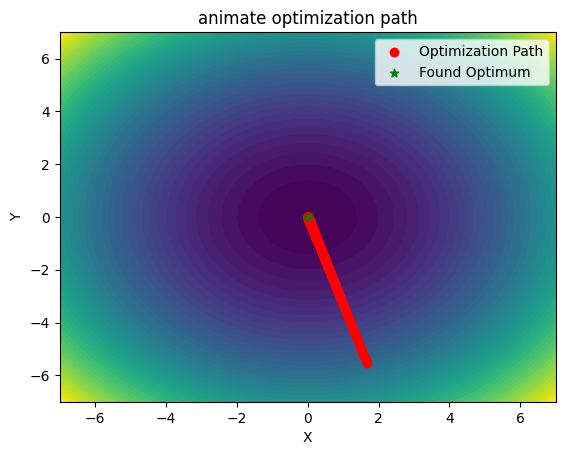

In [75]:
from matplotlib.animation import FuncAnimation

def animate_optimization_path(path, func, title):
    x = np.linspace(-7, 7, 400)
    y = np.linspace(-7, 7, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig, ax = plt.subplots()
    contour = ax.contourf(X, Y, Z, cmap='viridis', levels=50)
    scatter = ax.scatter([], [], color='red', marker='o', label='Optimization Path')
    optimum = ax.scatter([], [], color='green', marker='*', label='Found Optimum')

    def update(frame):
        scatter.set_offsets(path[:frame, :])
        optimum.set_offsets(path[frame - 1:frame, :])

    ani = FuncAnimation(fig, update, frames=len(path), blit=False)
    ani.save('basic_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


def anima_testing_pipeline():
    learning_rate = 0.01
    max_iterations = 1000

    start_point = np.random.uniform(-7, 7), np.random.uniform(-7, 7)
    history, optimal_point = gradient_descent(sphere, sphere_grad, start_point, learning_rate, max_iterations)
    # Calculate error
    analytical_minimum = sphere(0.0, 0.0)  # Analytical minimum for sphere function
    error = np.linalg.norm(optimal_point - analytical_minimum)
    print(f'Mean error for sphere: {error:.10f}')
    animate_optimization_path(history, sphere, 'animate optimization path')


anima_testing_pipeline()


In [76]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/basic_animation.mp4"

mp4 = open(save_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

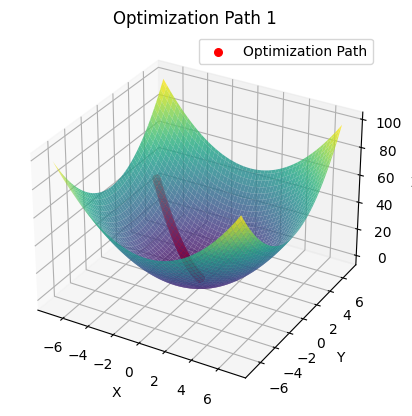

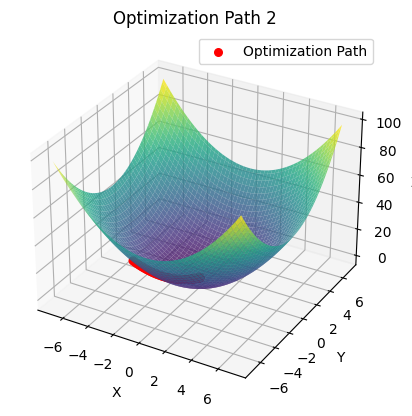

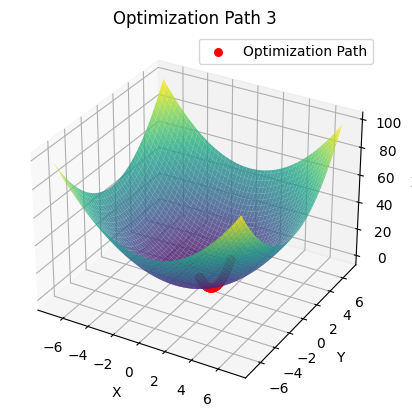

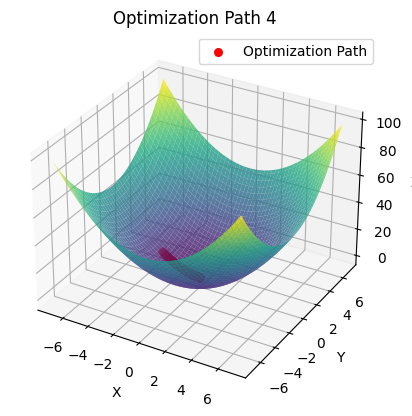

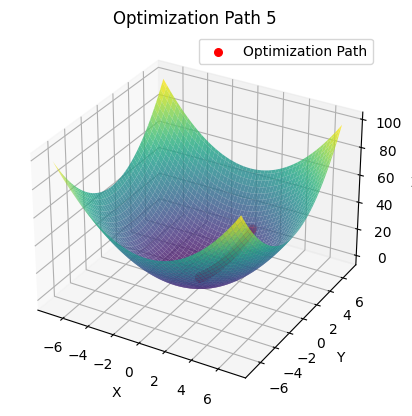

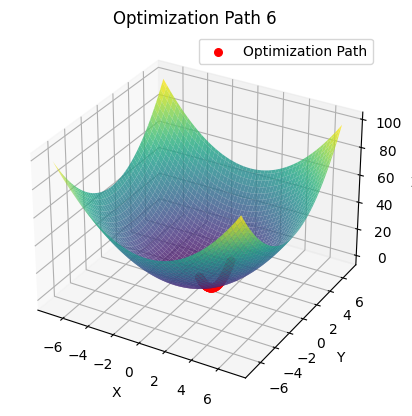

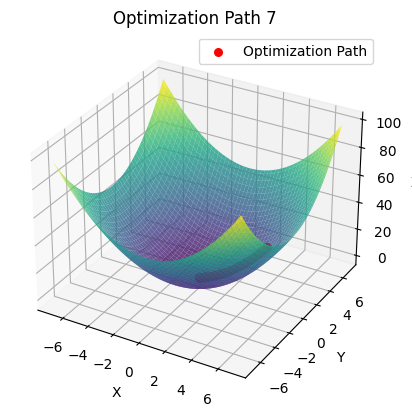

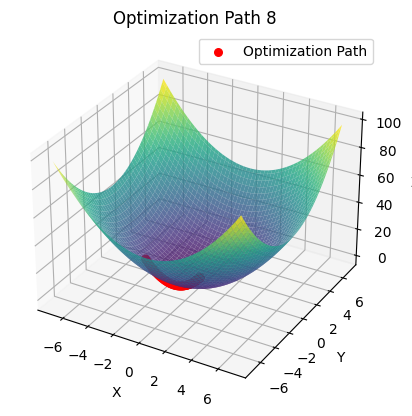

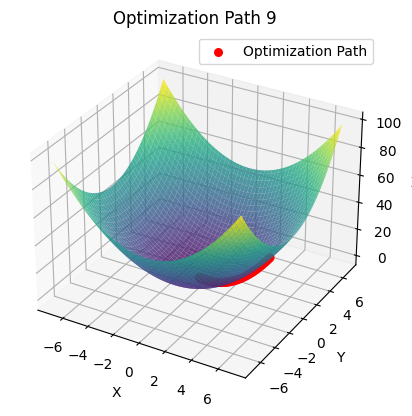

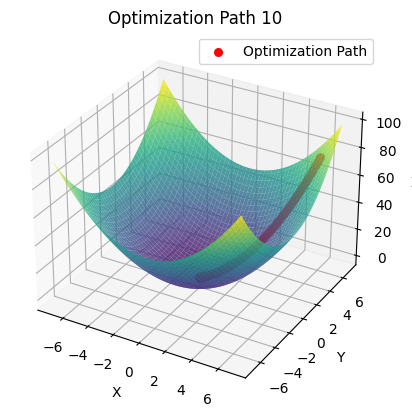

Errors: [2.4066895837694462e-09, 2.4345882702159354e-09, 2.4739132734987574e-09, 2.4566015193964585e-09, 2.4796760428250877e-09, 2.481983554369764e-09, 2.4905054048485846e-09, 2.4909634884988234e-09, 2.438109645068966e-09, 2.479214730555523e-09]


In [77]:
def visualize_optimization_3d(history_x, history_y, history_z, function, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(-7, 7, 100)
    y = np.linspace(-7, 7, 100)
    x, y = np.meshgrid(x, y)
    z = function(x, y)

    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
    ax.scatter(history_x, history_y, history_z, color='red', marker='o', s=30, label='Optimization Path')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(title)

    plt.show()


def testing_pipeline(function, grad_function, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):

    errors = []
    for _ in range(10):
        start_point = np.random.uniform(-7, 7), np.random.uniform(-7, 7)
        history, optimal_point = gradient_descent(function, grad_function, start_point, learning_rate, max_iterations, tolerance)

        # x, y = analytical_minimum
        error = np.linalg.norm(optimal_point)
        errors.append(error)
        visualize_optimization_3d([point[0] for point in history],
                                  [point[1] for point in history],
                                  [function(point[0], point[1]) for point in history],
                                  function, f'Optimization Path {len(errors)}')


    print("Errors:", errors)

testing_pipeline(sphere, sphere_grad)


## Запрограммировать метод вычисления градиента
    * Передача функции градиента от пользователя
    * Символьное вычисление градиента (например с помощью sympy) (на доп балл)
    * Численная аппроксимация градиента (на доп балл)

In [78]:
# himmelblau
def user_defined_gradient(x, y):
    df_dx = 4 * x * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7)
    df_dy = 2 * (x ** 2 + y - 11) + 4 * y * (x + y ** 2 - 7)
    return df_dx, df_dy

x_val = 3.0
y_val = 2.0
gradient_user_defined = user_defined_gradient(x_val, y_val)
print(f"User Gradient at ({x_val}, {y_val}): {gradient_user_defined}")


User Gradient at (3.0, 2.0): (0.0, 0.0)


In [79]:
import sympy as sp

x, y = sp.symbols('x y')
himmelblau_symbolic = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

gradient_symbolic = [sp.diff(himmelblau_symbolic, var) for var in (x, y)]

gradient_symbolic_function = sp.lambdify((x, y), gradient_symbolic, 'numpy')


x_val = 3.0
y_val = 2.0
gradient_sympy = gradient_symbolic_function(x_val, y_val)
print(f"Symbolic Gradient at ({x_val}, {y_val}): {gradient_sympy}")

Symbolic Gradient at (3.0, 2.0): [0.0, 0.0]


In [80]:
def numerical_gradient(function, x, y, epsilon=1e-10):
    df_dx = (function(x + epsilon, y) - function(x - epsilon, y)) / (2 * epsilon)
    df_dy = (function(x, y + epsilon) - function(x, y - epsilon)) / (2 * epsilon)
    return df_dx, df_dy

def himmelblau_function(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

x_val = 3.0
y_val = 2.0
gradient_numerical = numerical_gradient(himmelblau_function, x_val, y_val)
print(f"Numerical Gradient at ({x_val}, {y_val}): {gradient_numerical}")


Numerical Gradient at (3.0, 2.0): (0.0, 0.0)


## Модицфикации
Запрограммировать одну моментную модификацию и протестировать ее

Запрограммировать одну адаптивную модификацию и протестировать ее

Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [81]:
def gradient_descent_momentum(function, grad_function, start_point, learning_rate=0.01, momentum=0.9, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point
    velocity = np.zeros_like(start_point)

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        velocity = momentum * velocity + learning_rate * grad
        new_x, new_y = np.array([x, y]) - velocity
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

In [90]:
def adam_optimization(function, grad_function, start_point, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iterations=1000, tolerance=1e-6):
    path = [start_point]
    x, y = start_point
    m, v = np.zeros_like(start_point), np.zeros_like(start_point)
    t = 0

    for _ in range(max_iterations):
        t += 1
        grad = grad_function(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        new_x, new_y = np.array([x, y]) - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

In [87]:
def adaptive_learning_rate(function, grad_function, start_point, learning_rate=0.01, max_iterations=1500, tolerance=1e-6, improvement_threshold=0.1):
    path = [start_point]
    x, y = start_point
    learning_rate = learning_rate
    best_value = float('inf')

    for _ in range(max_iterations):
        grad = grad_function(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        new_value = function(new_x, new_y)

        if new_value < best_value - tolerance * improvement_threshold:
            best_value = new_value
        else:
            learning_rate /= 2  # Уменьшение шага обучения

        path.append((new_x, new_y))
        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

[-2.94141701e-05 -3.02497241e-05]


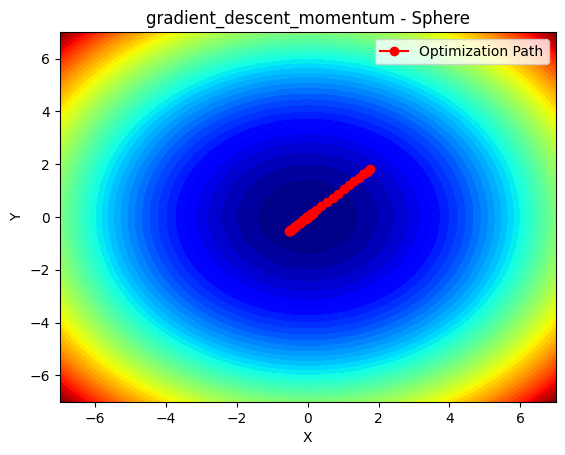

[3.00000062 2.00000742]


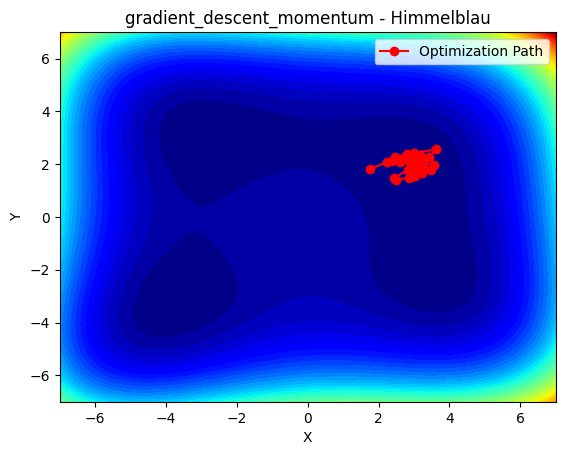

[0.89651585 0.9423    ]


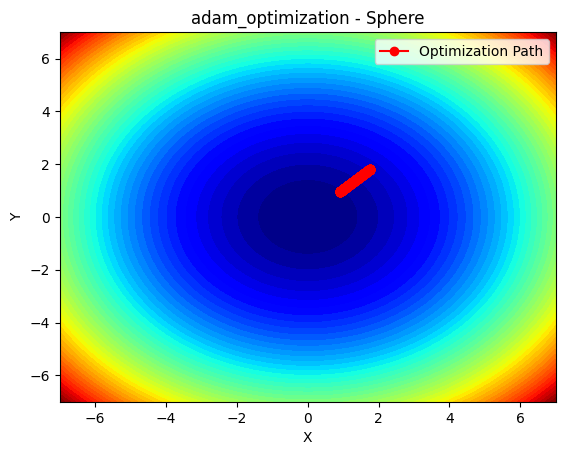

[2.59337029 2.24690835]


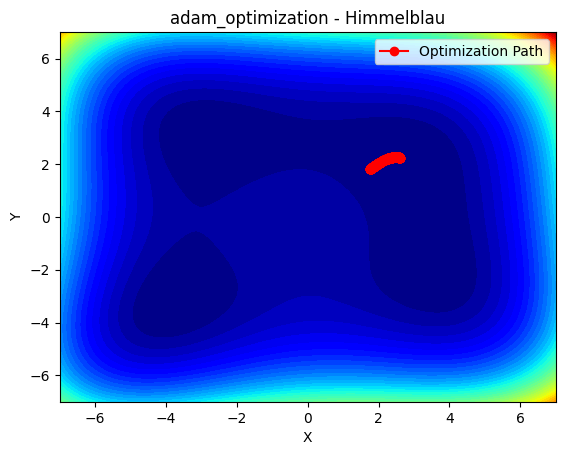

[0.00105013 0.00107996]


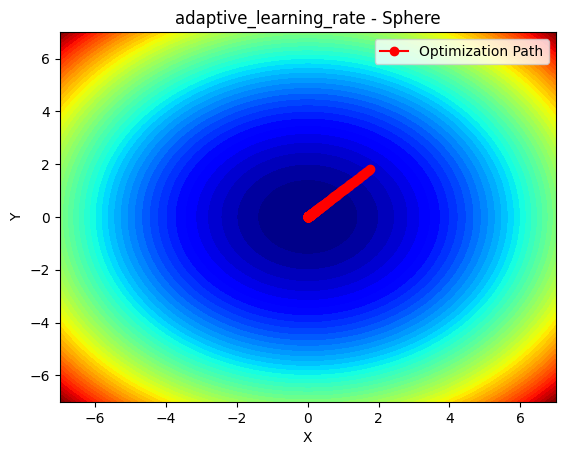

[2.99997821 2.0000526 ]


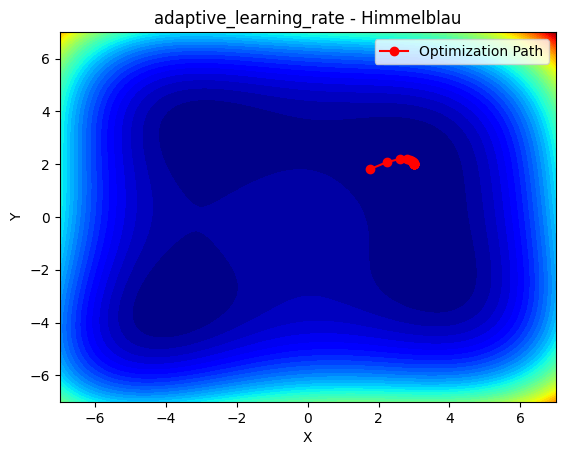

In [96]:
start_point = np.random.uniform(-7, 7), np.random.uniform(-7, 7)
functions = [sphere, himmelblau]
functions_grad = [sphere_grad, himmelblau_grad]
function_names = ['Sphere', 'Himmelblau']
methods = [gradient_descent_momentum, adam_optimization, adaptive_learning_rate]
methods_names = ['gradient_descent_momentum', 'adam_optimization', 'adaptive_learning_rate']
for methods, methods_names in zip(methods, methods_names):
    for func, func_grad, name in zip(functions,functions_grad, function_names):
        path = methods(func, func_grad, start_point)
        print(path[-1])
        x = np.linspace(-7, 7, 400)
        y = np.linspace(-7, 7, 400)
        X, Y = np.meshgrid(x, y)
        Z = func(X, Y)
        plt.figure()
        plt.title(f'{methods_names} - {name}')
        plt.contourf(X, Y, Z, cmap='jet', levels=50)
        plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()